# 전체 과정
- feature_names : 학습(훈련), 예측에 사용할 단어 사전입니다.
- label_name : 정답값
- X_train : 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
- X_test : 예측에 사용할 데이터셋 예) 실전 시험문제
- y_train : 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
- model : 학습, 예측에 사용할 머신러닝 알고리즘
- model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.
- model.predict(X_test) : 예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.
- score
  - 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
- metric
  - 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)


In [ ]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn")
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

C:\Users\user\AppData\Local\Temp\ipykernel_1576\1040283735.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
get_font_family()

'Malgun Gothic'

In [5]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]

In [6]:
df = pd.DataFrame(corpus, columns=["문서"])

## 정답 데이터 만들기
- 코로나가 들어가면 "보건"으로 그 외는 "교통"으로 레이블링


In [8]:
df["문서"].str.contains("코로나")

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
Name: 문서, dtype: bool

In [26]:
df.loc[df["문서"].str.contains("코로나"), "분류"] = '보건'
df.loc[~df["문서"].str.contains("코로나"), "분류"] = '교통'

,문서,분류
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,보건
1,지하철 운행시간과 지하철 요금 문의입니다.,교통
2,지하철 승강장 문의입니다.,교통
3,코로나 선별진료소 문의입니다.,보건
4,버스 운행시간 문의입니다.,교통
5,버스 터미널 위치 안내입니다.,교통
6,코로나 거리두기 안내입니다.,보건
7,택시 승강장 문의입니다.,교통


In [28]:
df

,문서,분류
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,보건
1,지하철 운행시간과 지하철 요금 문의입니다.,교통
2,지하철 승강장 문의입니다.,교통
3,코로나 선별진료소 문의입니다.,보건
4,버스 운행시간 문의입니다.,교통
5,버스 터미널 위치 안내입니다.,교통
6,코로나 거리두기 안내입니다.,보건
7,택시 승강장 문의입니다.,교통


In [29]:
# 정답 값 빈도수 확인
df["분류"].value_counts()

분류
교통    5
보건    3
Name: count, dtype: int64

# 텍스트 데이터 수치 형태로 변경하기
---

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
# 학습 시키기
# fit() => 학습만
# fit_transform() => 학습 및 변환
# text to sparse matrix(희소 행렬)
dtm = cvect.fit_transform(df["문서"])
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

# DTM(document-term matrix)
---

In [36]:
# 피처 가져오기
# get_feature_names is deprecated in 1.0 and will be removed in 1.2
# feature_names
# cvect.get_feature_names() -> deprecated
feature_names = cvect.get_feature_names_out()
feature_names # <- 단어사전 == vocabulary

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [38]:
cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [41]:
# dtm(document-term matrix)
"""
순서를 고려하지 않은 단어의 등장 빈도수 기반 모델 bag of words(BOW) -> 단어사전모델
문장에서 단어의 등장 숫자를 세어줌 -> CountVectorizer -> sklearn에서 BOW모델을 사용할 수 있게 해줌
"""
pd.DataFrame(dtm.toarray(), columns=feature_names)

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


# 문제와 정답 만들기
---

In [43]:
# 독립변수로 사용할 X 변수에 dtm array 할당
# 예) 시험문제
X = dtm.toarray()
X

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [45]:
# 종속변수로 사용할 y 변수에 정답값인 "category" 할당
# 예) 시험의 정답
y = df["분류"]
y

0    보건
1    교통
2    교통
3    보건
4    교통
5    교통
6    보건
7    교통
Name: 분류, dtype: object

## 데이터셋 나누기
- 데이터셋을 나눌 때 가장 흔히 하는 실수는?
- train, test를 잘못 나누는 일. 문제와 정답의 수가 맞는지 확인

In [49]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 할당
split_count = int(df.shape[0] * 0.8)


In [52]:
# 학습 세트 만들기 예) 기출문제
# 학습 세트의 정답 만들기 예) 기출문제의 정답
x_train = X[:split_count]
y_train = y[:split_count]
print(x_train.shape, y_train.shape)
x_train, y_train

(6, 16) (6,)


(array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]], dtype=int64),
 0    보건
 1    교통
 2    교통
 3    보건
 4    교통
 5    교통
 Name: 분류, dtype: object)

In [58]:
# 테스트 세트 만들기 예) 실전 시험문제
# 테스트 세트의 정답 만들기 예) 실전 문제의 정답
# x_text, y_test
x_test = X[split_count:]
y_test = y[split_count:]
print(x_test.shape, y_test.shape)
x_test,y_test

(2, 16) (2,)


(array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64),
 6    보건
 7    교통
 Name: 분류, dtype: object)

## 머신러닝 모델 로드

In [63]:
# DecisionTreeClassifier 사용 ( 의사결정트리 )
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 학습(훈련)
- 시험을 볼 때 기출문제(x_train)와 정답(y_train)을 보고 공부하는 과정과 유사

In [64]:
# fit(기출문제, 정답)
model.fit(x_train,y_train)

DecisionTreeClassifier()

# 예측
- 실전 시험문제(x_test) 우리가 정답을 직접 예측

In [66]:
y_predict = model.predict(x_test)
y_predict

array(['보건', '교통'], dtype=object)

# 평가

## 정확도(Accuracy) 측정

In [68]:
# 예측의 정확도 구하기
(y_test == y_predict).mean() * 100

100.0

In [69]:
# sklearn에서 제공하는 정확도 함수
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) 

1.0

In [70]:
# crosstab을 활용한 confusion matrix
pd.crosstab(y_test,y_predict)

col_0,교통,보건
분류,,
교통,1,0
보건,0,1


In [71]:
# confusion_matrix 활용
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[1, 0],
       [0, 1]], dtype=int64)

# 트리 알고리즘 분석
- 의사결정트리 시각화

In [72]:
# export_text 로 트리 분석
from sklearn.tree import export_text
print(export_text(model))

|--- feature_13 <= 0.50
|   |--- class: 교통
|--- feature_13 >  0.50
|   |--- class: 보건



[Text(0.5, 0.75, '코로나 <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

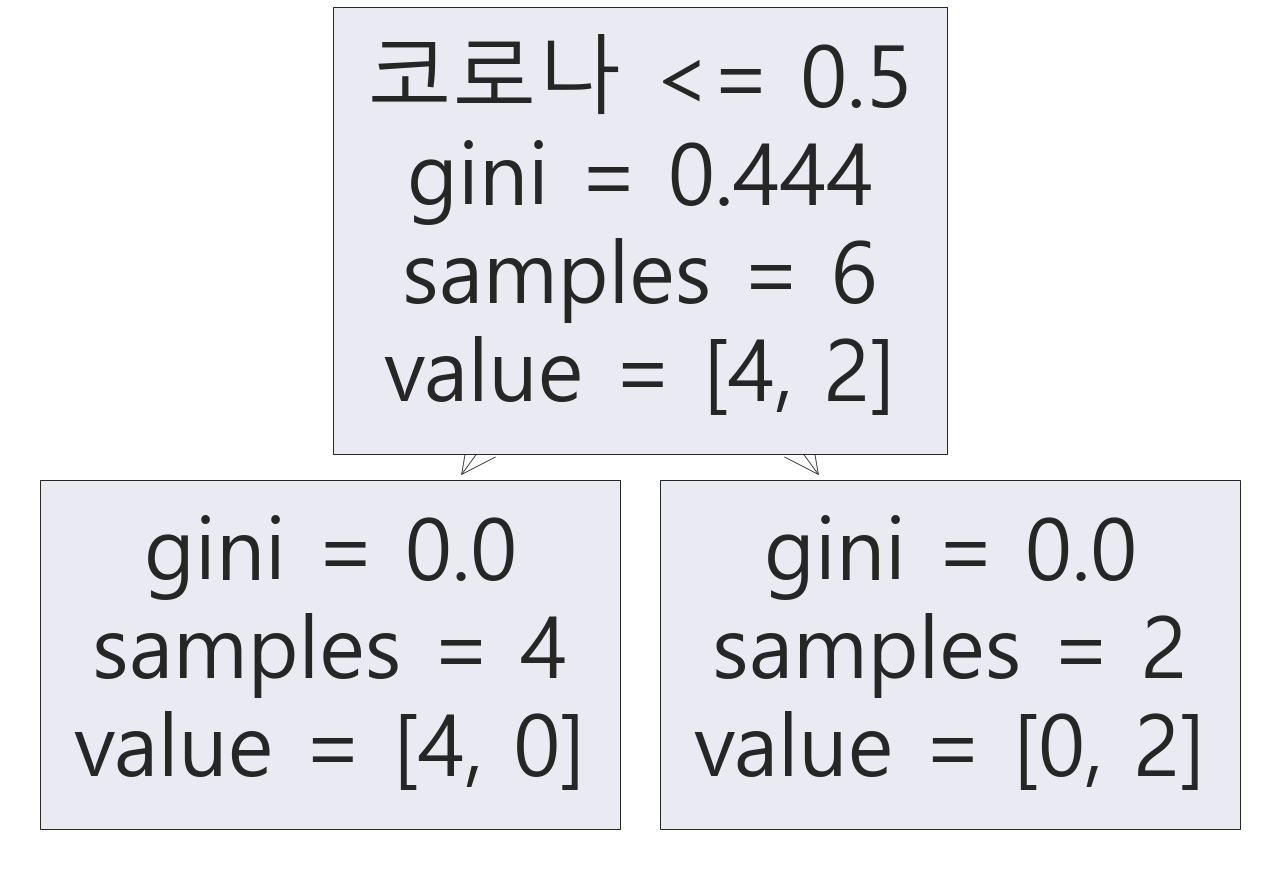

In [74]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=feature_names)

<Axes: >

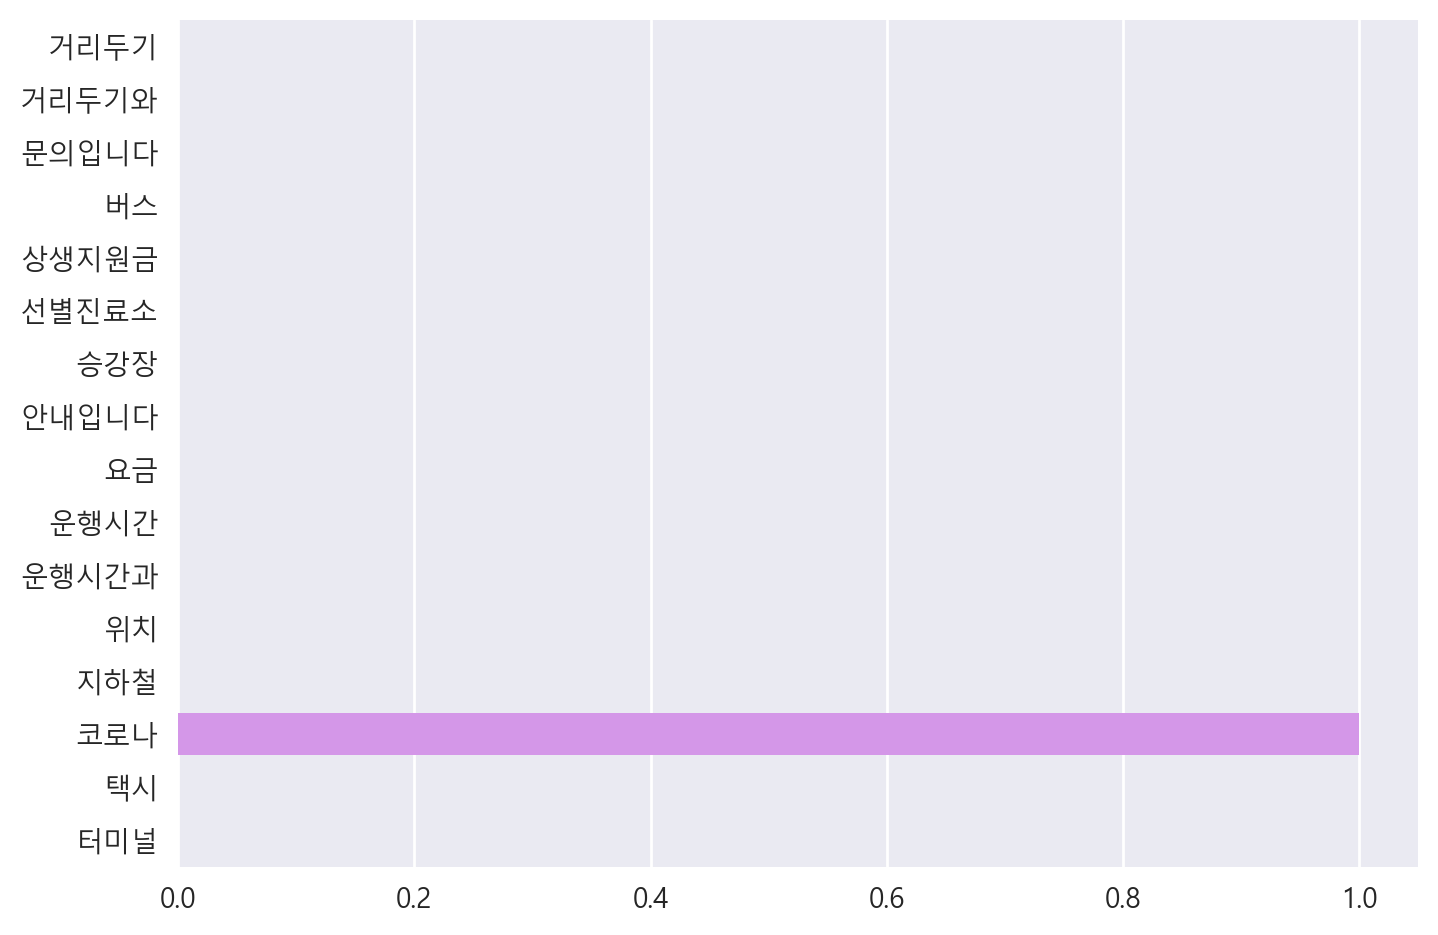

In [76]:
# feature_importances_ 로 피처 중요도 확인
sns.barplot(x=model.feature_importances_,y=feature_names)